# Extended Kalman Filter localization

The Extended Kalman Filter (EKF) is a nonlinear version of the Kalman Filter which linearizes about the current mean and covariance. It is used extensively in robotics for localization and tracking problems.

## Theory

The EKF algorithm involves the following steps:

1. Prediction Step: Predict the state and covariance at the next time step based on the motion model.
2. Update Step: Update the predicted state and covariance with the new measurements using the observation model.

### Math equation

1. **State Prediction:**

State transition model: $\mathbf{x}_k = f(\mathbf{x}_{k-1}, \mathbf{u}_k)$

Predicted state: $\hat{\mathbf{x}}_k^- = f(\hat{\mathbf{x}}_{k-1}, \mathbf{u}_k)$


Jacobian of the state transition model: $\mathbf{F}_k = \frac{\partial f}{\partial \mathbf{x}} \bigg|_{\hat{\mathbf{x}}_{k-1}, \mathbf{u}_k}$

Predicted covariance: $\mathbf{P}_k^- = \mathbf{F}_k \mathbf{P}_{k-1} \mathbf{F}_k^T + \mathbf{Q}_k$

2. **Measurement Update**:

Measurement model: $\mathbf{z}_k = h(\mathbf{x}_k)$

Predicted measurement: $\hat{\mathbf{z}}_k = h(\hat{\mathbf{x}}_k^-)$


Jacobian of the measurement model: $\mathbf{H}_k = \frac{\partial h}{\partial \mathbf{x}} \bigg|_{\hat{\mathbf{x}}_k^-}$

Update: $\mathbf{y}_k = \mathbf{z}_k - \hat{\mathbf{z}}_k$

Update covariance: $\mathbf{S}_k = \mathbf{H}_k \mathbf{P}_k^- \mathbf{H}_k^T + \mathbf{R}_k$

Kalman gain: $\mathbf{K}_k = \mathbf{P}_k^- \mathbf{H}_k^T \mathbf{S}_k^{-1}$

Updated state: $\hat{\mathbf{x}}_k = \hat{\mathbf{x}}_k^- + \mathbf{K}_k \mathbf{y}_k$

Updated covariance: $\mathbf{P}_k = (\mathbf{I} - \mathbf{K}_k \mathbf{H}_k) \mathbf{P}_k^-$


### Python Example with Visualization

Let's implement an EKF for a simple mobile robot localization problem where the robot moves in a 2D plane.

In this example:

1. We define the motion and measurement models, along with their Jacobians.
2. We initialize the state and covariance matrix.
3. We iterate over a number of steps to simulate the robot's motion and perform the EKF prediction and update steps.
4. We plot the estimated path and measurements.

This provides a complete EKF implementation for a mobile robot localization problem with visualization. 
Complete the functions!

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Motion model (f function) and its Jacobian (F)
def motion_model(x, u, dt):
    theta = x[2]
    v, w = u

    model = None # Complete the motion model

    return model

In [20]:
def jacobian_motion_model(x, u, dt):
    theta = x[2]
    v, _ = u

    Jac_motion_model = None # Jabobian
    
    return Jac_motion_model

In [21]:
# Measurement model (h function) and its Jacobian (H)
def measurement_model(x):
    return np.array([None, None])  # Assume we can directly measure position

In [16]:
def jacobian_measurement_model(x):
    return np.array([
        [1, 0, 0],
        [0, 1, 0]
    ])

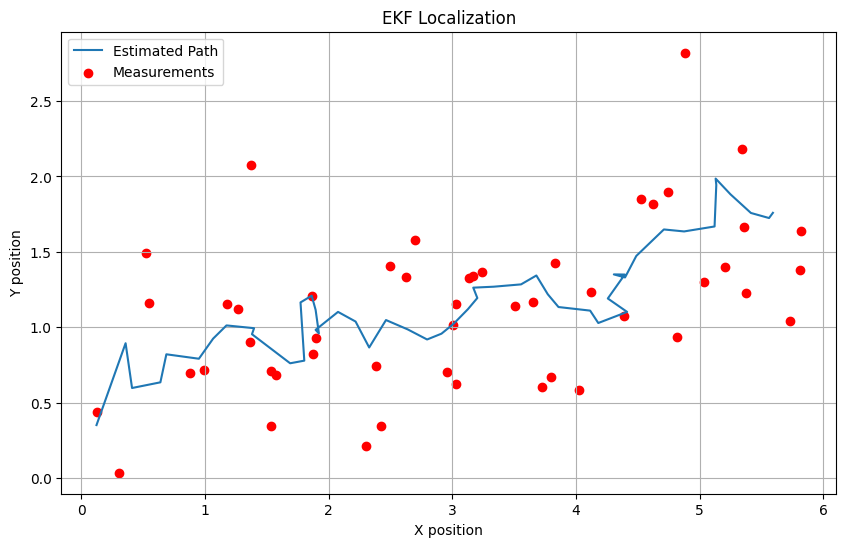

In [22]:
# Initial state
x = np.array([0, 0, 0])  # [x, y, theta]
P = np.eye(3)  # Initial covariance

# Process and measurement noise
Q = np.diag([0.1, 0.1, np.deg2rad(1)])**2
R = np.diag([0.5, 0.5])**2

# Control inputs (velocity v and angular velocity w)
u = np.array([1, np.deg2rad(10)])

# Time step
dt = 0.1

# Number of steps
num_steps = 50

# Storage for plotting
state_history = []
measurement_history = []

for _ in range(num_steps):
    # Prediction step
    x_pred = None # call the respective function
    F = None # call the respective function
    P_pred = None # Compute
    
    # Simulate measurement
    z = None # Compute
    
    # Update step
    H = None # call the respective function
    z_pred = measurement_model(x_pred)
    y = None # Complete
    S = None # Complete
    K = None # Complete
    x = None # Complete
    P = None # Complete
    
    # Store for plotting
    state_history.append(x)
    measurement_history.append(z)

# Convert to arrays for plotting
state_history = np.array(state_history)
measurement_history = np.array(measurement_history)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(state_history[:, 0], state_history[:, 1], label='Estimated Path')
plt.scatter(measurement_history[:, 0], measurement_history[:, 1], color='r', label='Measurements')
plt.title('EKF Localization')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.legend()
plt.grid()
plt.show()
